In [1]:
from params import input_params, time_params
from random_dna_chem import RandomDNAStrandDisplacementCircuit
from perturb_chem import RandomDNAChemPerturbationGillespy2
from collections import OrderedDict
import matplotlib.pyplot as plt
import sys, getopt
%matplotlib inline


Text(0, 0.5, 'Number of molecules')

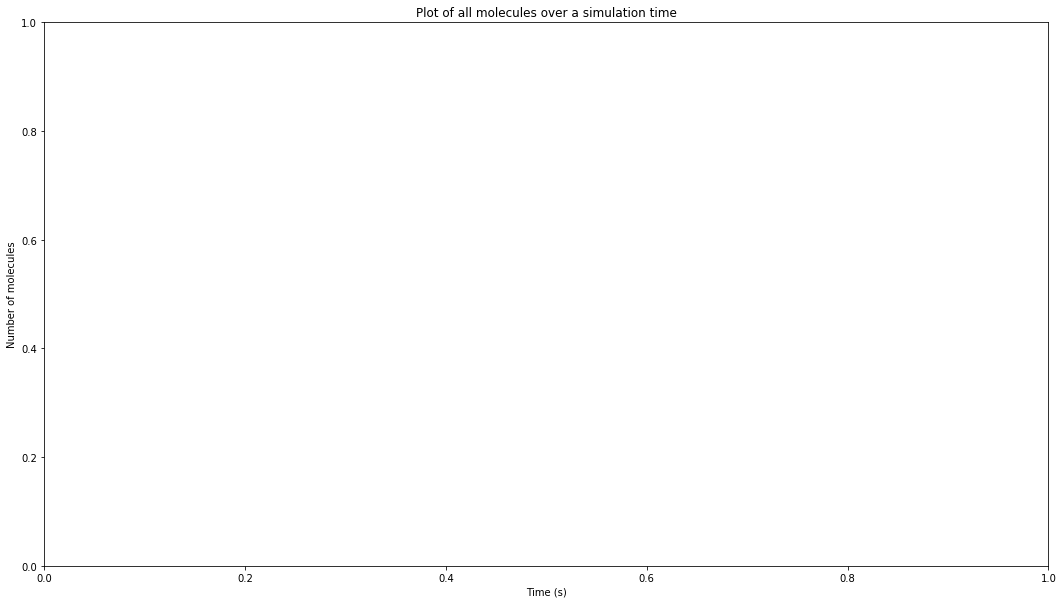

In [2]:
randomDNAChem = RandomDNAStrandDisplacementCircuit(input_params=input_params, 
                                                   time_params=time_params)

color_array = ['#000000', '#0000FF', '#00FF00', '#00FFFF', '#000080',
               '#008000', '#008080', '#800000', '#800080', '#808000',
               '#808080', '#C0C0C0', '#FF0000', '#FF00FF', '#FFFF00',
               '#8B0000', '#006400', '#BDB76B', '#008B8B', '#191970']

plt.figure(figsize = (18,10))
plt.title('Plot of all molecules over a simulation time')
plt.xlabel('Time (s)')
plt.ylabel('Number of molecules')

In [3]:
gillespy2_results = []
num_trajectories = 2

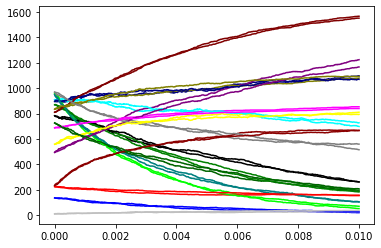

In [4]:
# Creating the Gillespy2 chemistry model in the non-perturb period
gillespy2_model = RandomDNAChemPerturbationGillespy2(non_gillespy2_chem=randomDNAChem,
                                                     rate_in_timeIndex=0, # index 0 for time t=0
                                                     period_start=randomDNAChem.time_params['time_array'][0],
                                                     period_end=randomDNAChem.time_params['time_array'][1],
                                                     previous_gillespy2_result=None)

# Result of stochastic Gillespie simulation for non-perturbation period
gillespy2_result = gillespy2_model.run(number_of_trajectories=num_trajectories)

# Result of stochastic Gillespie simulation for entire simulation time
gillespy2_results.append(gillespy2_result)

# Plot non-perturb period
for index in range(num_trajectories):
    trajectory = gillespy2_result[index]
    for species_index, species in enumerate(randomDNAChem.species_lookup['S']):
        species_plot = plt.plot(trajectory['time'],
                                trajectory['{}'.format(species)],
                                color=color_array[species_index],
                                label=species)

In [5]:
print(len(gillespy2_results))

1


In [6]:
print(len(gillespy2_result))

2


In [7]:
print(gillespy2_result)

[{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([783., 784., 783., ..., 264., 264., 262.]), 'U1': array([137., 136., 135., ...,  21.,  21.,  21.]), 'U2': array([960., 953., 951., ...,  71.,  71.,  71.]), 'L0': array([909., 907., 910., ..., 700., 700., 699.]), 'L1': array([ 896.,  896.,  896., ..., 1096., 1097., 1097.]), 'L2': array([870., 870., 871., ..., 198., 198., 198.]), 'L3': array([949., 944., 936., ..., 106., 105., 104.]), 'U2L2': array([ 811.,  813.,  813., ..., 1551., 1551., 1551.]), 'U0L0': array([ 495.,  496.,  496., ..., 1223., 1223., 1224.]), 'U0L3': array([ 835.,  834.,  835., ..., 1078., 1079., 1080.]), 'U0L1': array([969., 968., 968., ..., 517., 516., 516.]), 'U1L0': array([11., 13., 13., ..., 29., 29., 29.]), 'U1L2': array([226., 224., 223., ..., 158., 158., 158.]), 'U1L3': array([688., 689., 691., ..., 854., 854., 854.]), 'U2L1': array([559., 560., 560., ..., 811., 811., 811.]), 'U2L3': array([234., 239., 244., ..., 668.

In [8]:
print(gillespy2_result[0])

{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([783., 784., 783., ..., 264., 264., 262.]), 'U1': array([137., 136., 135., ...,  21.,  21.,  21.]), 'U2': array([960., 953., 951., ...,  71.,  71.,  71.]), 'L0': array([909., 907., 910., ..., 700., 700., 699.]), 'L1': array([ 896.,  896.,  896., ..., 1096., 1097., 1097.]), 'L2': array([870., 870., 871., ..., 198., 198., 198.]), 'L3': array([949., 944., 936., ..., 106., 105., 104.]), 'U2L2': array([ 811.,  813.,  813., ..., 1551., 1551., 1551.]), 'U0L0': array([ 495.,  496.,  496., ..., 1223., 1223., 1224.]), 'U0L3': array([ 835.,  834.,  835., ..., 1078., 1079., 1080.]), 'U0L1': array([969., 968., 968., ..., 517., 516., 516.]), 'U1L0': array([11., 13., 13., ..., 29., 29., 29.]), 'U1L2': array([226., 224., 223., ..., 158., 158., 158.]), 'U1L3': array([688., 689., 691., ..., 854., 854., 854.]), 'U2L1': array([559., 560., 560., ..., 811., 811., 811.]), 'U2L3': array([234., 239., 244., ..., 668.,

In [9]:
print(gillespy2_result[1])

{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([783., 781., 778., ..., 263., 263., 263.]), 'U1': array([137., 137., 137., ...,  29.,  29.,  29.]), 'U2': array([960., 959., 959., ...,  53.,  53.,  53.]), 'L0': array([909., 905., 907., ..., 727., 727., 728.]), 'L1': array([ 896.,  900.,  901., ..., 1071., 1071., 1070.]), 'L2': array([870., 870., 869., ..., 184., 184., 184.]), 'L3': array([949., 946., 941., ..., 107., 107., 107.]), 'U2L2': array([ 811.,  811.,  812., ..., 1566., 1566., 1566.]), 'U0L0': array([ 495.,  500.,  501., ..., 1167., 1167., 1167.]), 'U0L3': array([ 835.,  837.,  839., ..., 1092., 1092., 1092.]), 'U0L1': array([969., 964., 964., ..., 560., 560., 560.]), 'U1L0': array([11., 11., 11., ..., 38., 38., 38.]), 'U1L2': array([226., 226., 226., ..., 155., 155., 155.]), 'U1L3': array([688., 688., 688., ..., 840., 840., 840.]), 'U2L1': array([559., 560., 559., ..., 793., 793., 794.]), 'U2L3': array([234., 235., 238., ..., 667.,

In [10]:
print(gillespy2_results)

[[{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([783., 784., 783., ..., 264., 264., 262.]), 'U1': array([137., 136., 135., ...,  21.,  21.,  21.]), 'U2': array([960., 953., 951., ...,  71.,  71.,  71.]), 'L0': array([909., 907., 910., ..., 700., 700., 699.]), 'L1': array([ 896.,  896.,  896., ..., 1096., 1097., 1097.]), 'L2': array([870., 870., 871., ..., 198., 198., 198.]), 'L3': array([949., 944., 936., ..., 106., 105., 104.]), 'U2L2': array([ 811.,  813.,  813., ..., 1551., 1551., 1551.]), 'U0L0': array([ 495.,  496.,  496., ..., 1223., 1223., 1224.]), 'U0L3': array([ 835.,  834.,  835., ..., 1078., 1079., 1080.]), 'U0L1': array([969., 968., 968., ..., 517., 516., 516.]), 'U1L0': array([11., 13., 13., ..., 29., 29., 29.]), 'U1L2': array([226., 224., 223., ..., 158., 158., 158.]), 'U1L3': array([688., 689., 691., ..., 854., 854., 854.]), 'U2L1': array([559., 560., 560., ..., 811., 811., 811.]), 'U2L3': array([234., 239., 244., ..., 668

In [11]:
print(gillespy2_results[0]) # gillespy2_results[0] is gillespy2_result (one period - non-perturb 0--> 0.01)

[{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([783., 784., 783., ..., 264., 264., 262.]), 'U1': array([137., 136., 135., ...,  21.,  21.,  21.]), 'U2': array([960., 953., 951., ...,  71.,  71.,  71.]), 'L0': array([909., 907., 910., ..., 700., 700., 699.]), 'L1': array([ 896.,  896.,  896., ..., 1096., 1097., 1097.]), 'L2': array([870., 870., 871., ..., 198., 198., 198.]), 'L3': array([949., 944., 936., ..., 106., 105., 104.]), 'U2L2': array([ 811.,  813.,  813., ..., 1551., 1551., 1551.]), 'U0L0': array([ 495.,  496.,  496., ..., 1223., 1223., 1224.]), 'U0L3': array([ 835.,  834.,  835., ..., 1078., 1079., 1080.]), 'U0L1': array([969., 968., 968., ..., 517., 516., 516.]), 'U1L0': array([11., 13., 13., ..., 29., 29., 29.]), 'U1L2': array([226., 224., 223., ..., 158., 158., 158.]), 'U1L3': array([688., 689., 691., ..., 854., 854., 854.]), 'U2L1': array([559., 560., 560., ..., 811., 811., 811.]), 'U2L3': array([234., 239., 244., ..., 668.

In [12]:
print(gillespy2_results[0][0]) # trajectory 0

{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([783., 784., 783., ..., 264., 264., 262.]), 'U1': array([137., 136., 135., ...,  21.,  21.,  21.]), 'U2': array([960., 953., 951., ...,  71.,  71.,  71.]), 'L0': array([909., 907., 910., ..., 700., 700., 699.]), 'L1': array([ 896.,  896.,  896., ..., 1096., 1097., 1097.]), 'L2': array([870., 870., 871., ..., 198., 198., 198.]), 'L3': array([949., 944., 936., ..., 106., 105., 104.]), 'U2L2': array([ 811.,  813.,  813., ..., 1551., 1551., 1551.]), 'U0L0': array([ 495.,  496.,  496., ..., 1223., 1223., 1224.]), 'U0L3': array([ 835.,  834.,  835., ..., 1078., 1079., 1080.]), 'U0L1': array([969., 968., 968., ..., 517., 516., 516.]), 'U1L0': array([11., 13., 13., ..., 29., 29., 29.]), 'U1L2': array([226., 224., 223., ..., 158., 158., 158.]), 'U1L3': array([688., 689., 691., ..., 854., 854., 854.]), 'U2L1': array([559., 560., 560., ..., 811., 811., 811.]), 'U2L3': array([234., 239., 244., ..., 668.,

In [13]:
print(gillespy2_results[0][1]) # trajectory 1

{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([783., 781., 778., ..., 263., 263., 263.]), 'U1': array([137., 137., 137., ...,  29.,  29.,  29.]), 'U2': array([960., 959., 959., ...,  53.,  53.,  53.]), 'L0': array([909., 905., 907., ..., 727., 727., 728.]), 'L1': array([ 896.,  900.,  901., ..., 1071., 1071., 1070.]), 'L2': array([870., 870., 869., ..., 184., 184., 184.]), 'L3': array([949., 946., 941., ..., 107., 107., 107.]), 'U2L2': array([ 811.,  811.,  812., ..., 1566., 1566., 1566.]), 'U0L0': array([ 495.,  500.,  501., ..., 1167., 1167., 1167.]), 'U0L3': array([ 835.,  837.,  839., ..., 1092., 1092., 1092.]), 'U0L1': array([969., 964., 964., ..., 560., 560., 560.]), 'U1L0': array([11., 11., 11., ..., 38., 38., 38.]), 'U1L2': array([226., 226., 226., ..., 155., 155., 155.]), 'U1L3': array([688., 688., 688., ..., 840., 840., 840.]), 'U2L1': array([559., 560., 559., ..., 793., 793., 794.]), 'U2L3': array([234., 235., 238., ..., 667.,

In [14]:
print(gillespy2_results[0][0]['time']) # trajectory 0 - time array

[0.00e+00 1.00e-05 2.00e-05 ... 9.98e-03 9.99e-03 1.00e-02]


In [15]:
print(gillespy2_results[0][0]['U0']) # trajectory 0 - U0 array

[783. 784. 783. ... 264. 264. 262.]


In [16]:
print(gillespy2_results[0][1]['time']) # trajectory 1 - time array

[0.00e+00 1.00e-05 2.00e-05 ... 9.98e-03 9.99e-03 1.00e-02]


In [17]:
print(gillespy2_results[0][1]['U0']) # trajectory 0 - U0 array

[783. 781. 778. ... 263. 263. 263.]


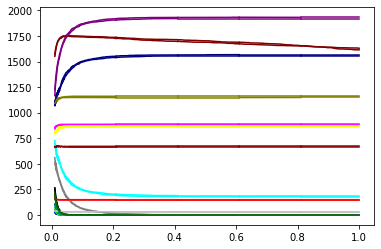

In [18]:
# Creating the Gillespy2 chemistry models in the perturb period
for time_index in range(1, len(randomDNAChem.time_params['time_array']) - 1):
    # Calculate the Gillespy2 time offset
    time_offset = randomDNAChem.time_params['t_perturb'] + randomDNAChem.time_params['t_hold'] * (time_index - 1)

    trajectories = []
    for index in range(num_trajectories):
        previous_trajectory = gillespy2_result[index] # take the gillespy2_result from the previous period

        # Creating one Gillespy2 chemistry model in one trajectory in one perturb period
        gillespy2_model = RandomDNAChemPerturbationGillespy2(non_gillespy2_chem=randomDNAChem,
                                                             rate_in_timeIndex=time_index, # index 1 for time t=1 and so on
                                                             period_start=randomDNAChem.time_params['time_array'][time_index] - time_offset,
                                                             period_end=randomDNAChem.time_params['time_array'][time_index + 1] - time_offset,
                                                             previous_gillespy2_result=previous_trajectory)
        trajectory = gillespy2_model.run(number_of_trajectories=1) # run the single trajectory
        trajectories.append(trajectory)
    gillespy2_result = trajectories # gillespy2_result of the current period

    # Result of stochastic Gillespie simulation for entire simulation time
    gillespy2_results.append(gillespy2_result)

    # Plot each of the perturb period
    for index in range(num_trajectories):
        trajectory = gillespy2_result[index]
        for species_index, species in enumerate(randomDNAChem.species_lookup['S']):
            species_plot = plt.plot(trajectory['time'] + time_offset,
                                    trajectory['{}'.format(species)],
                                    color=color_array[species_index],
                                    label=species)


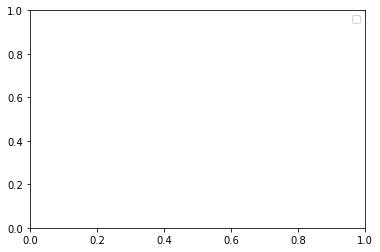

In [19]:
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best')
# plot_name = 'random_dna_chem_with_perturb_junk'
try:
    plot_name
except NameError:
    plt.show()
# else:
#     plt.savefig('plots/' + plot_name + '.eps')

In [20]:
print(len(gillespy2_results))

6


In [21]:
print(gillespy2_results[0])

[{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([783., 784., 783., ..., 264., 264., 262.]), 'U1': array([137., 136., 135., ...,  21.,  21.,  21.]), 'U2': array([960., 953., 951., ...,  71.,  71.,  71.]), 'L0': array([909., 907., 910., ..., 700., 700., 699.]), 'L1': array([ 896.,  896.,  896., ..., 1096., 1097., 1097.]), 'L2': array([870., 870., 871., ..., 198., 198., 198.]), 'L3': array([949., 944., 936., ..., 106., 105., 104.]), 'U2L2': array([ 811.,  813.,  813., ..., 1551., 1551., 1551.]), 'U0L0': array([ 495.,  496.,  496., ..., 1223., 1223., 1224.]), 'U0L3': array([ 835.,  834.,  835., ..., 1078., 1079., 1080.]), 'U0L1': array([969., 968., 968., ..., 517., 516., 516.]), 'U1L0': array([11., 13., 13., ..., 29., 29., 29.]), 'U1L2': array([226., 224., 223., ..., 158., 158., 158.]), 'U1L3': array([688., 689., 691., ..., 854., 854., 854.]), 'U2L1': array([559., 560., 560., ..., 811., 811., 811.]), 'U2L3': array([234., 239., 244., ..., 668.

In [22]:
print(gillespy2_results[0][0]) # trajectory 0 of period 0 to 0.01 --> results[period][traj]

{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([783., 784., 783., ..., 264., 264., 262.]), 'U1': array([137., 136., 135., ...,  21.,  21.,  21.]), 'U2': array([960., 953., 951., ...,  71.,  71.,  71.]), 'L0': array([909., 907., 910., ..., 700., 700., 699.]), 'L1': array([ 896.,  896.,  896., ..., 1096., 1097., 1097.]), 'L2': array([870., 870., 871., ..., 198., 198., 198.]), 'L3': array([949., 944., 936., ..., 106., 105., 104.]), 'U2L2': array([ 811.,  813.,  813., ..., 1551., 1551., 1551.]), 'U0L0': array([ 495.,  496.,  496., ..., 1223., 1223., 1224.]), 'U0L3': array([ 835.,  834.,  835., ..., 1078., 1079., 1080.]), 'U0L1': array([969., 968., 968., ..., 517., 516., 516.]), 'U1L0': array([11., 13., 13., ..., 29., 29., 29.]), 'U1L2': array([226., 224., 223., ..., 158., 158., 158.]), 'U1L3': array([688., 689., 691., ..., 854., 854., 854.]), 'U2L1': array([559., 560., 560., ..., 811., 811., 811.]), 'U2L3': array([234., 239., 244., ..., 668.,

In [23]:
print(gillespy2_results[0][1]) # trajectory 1 of period 0 to 0.01

{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([783., 781., 778., ..., 263., 263., 263.]), 'U1': array([137., 137., 137., ...,  29.,  29.,  29.]), 'U2': array([960., 959., 959., ...,  53.,  53.,  53.]), 'L0': array([909., 905., 907., ..., 727., 727., 728.]), 'L1': array([ 896.,  900.,  901., ..., 1071., 1071., 1070.]), 'L2': array([870., 870., 869., ..., 184., 184., 184.]), 'L3': array([949., 946., 941., ..., 107., 107., 107.]), 'U2L2': array([ 811.,  811.,  812., ..., 1566., 1566., 1566.]), 'U0L0': array([ 495.,  500.,  501., ..., 1167., 1167., 1167.]), 'U0L3': array([ 835.,  837.,  839., ..., 1092., 1092., 1092.]), 'U0L1': array([969., 964., 964., ..., 560., 560., 560.]), 'U1L0': array([11., 11., 11., ..., 38., 38., 38.]), 'U1L2': array([226., 226., 226., ..., 155., 155., 155.]), 'U1L3': array([688., 688., 688., ..., 840., 840., 840.]), 'U2L1': array([559., 560., 559., ..., 793., 793., 794.]), 'U2L3': array([234., 235., 238., ..., 667.,

In [24]:
print(gillespy2_results[0][2]) # trajectory 2 of period 0 to 0.01

IndexError: list index out of range

In [25]:
print(gillespy2_results[0][0]['time']) # time element of trajectory 0 of period 0 to 0.01 --> results[period][traj][time]

[0.00e+00 1.00e-05 2.00e-05 ... 9.98e-03 9.99e-03 1.00e-02]


In [26]:
print(gillespy2_results[0][0]['U0']) # U0 element of trajectory 0 of period 0 to 0.01 --> results[period][traj][concen]

[783. 784. 783. ... 264. 264. 262.]


In [27]:
print(gillespy2_results[1][0]['time']) # time element of trajectory 0 of period 0.01 to 0.21

[0.         0.0002002  0.0004004  0.0006006  0.0008008  0.001001
 0.0012012  0.0014014  0.0016016  0.0018018  0.002002   0.0022022
 0.0024024  0.0026026  0.0028028  0.003003   0.0032032  0.0034034
 0.0036036  0.0038038  0.004004   0.0042042  0.0044044  0.0046046
 0.0048048  0.00500501 0.00520521 0.00540541 0.00560561 0.00580581
 0.00600601 0.00620621 0.00640641 0.00660661 0.00680681 0.00700701
 0.00720721 0.00740741 0.00760761 0.00780781 0.00800801 0.00820821
 0.00840841 0.00860861 0.00880881 0.00900901 0.00920921 0.00940941
 0.00960961 0.00980981 0.01001001 0.01021021 0.01041041 0.01061061
 0.01081081 0.01101101 0.01121121 0.01141141 0.01161161 0.01181181
 0.01201201 0.01221221 0.01241241 0.01261261 0.01281281 0.01301301
 0.01321321 0.01341341 0.01361361 0.01381381 0.01401401 0.01421421
 0.01441441 0.01461461 0.01481481 0.01501502 0.01521522 0.01541542
 0.01561562 0.01581582 0.01601602 0.01621622 0.01641642 0.01661662
 0.01681682 0.01701702 0.01721722 0.01741742 0.01761762 0.01781782


In [28]:
print(gillespy2_results[1][0]['U0']) # U0 element of trajectory 0 of period 0.01 to 0.21

[262. 251. 249. 248. 242. 239. 230. 226. 220. 213. 209. 203. 199. 190.
 185. 184. 182. 180. 175. 170. 162. 155. 154. 149. 143. 141. 137. 135.
 130. 127. 124. 119. 117. 109. 107. 108. 107. 107. 103. 102. 101.  97.
  96.  94.  89.  86.  85.  83.  80.  79.  76.  74.  73.  70.  69.  68.
  68.  68.  67.  66.  64.  61.  61.  61.  57.  56.  55.  55.  54.  54.
  51.  50.  49.  47.  46.  44.  44.  43.  42.  42.  41.  41.  38.  37.
  34.  33.  32.  32.  31.  31.  31.  29.  30.  29.  29.  29.  28.  27.
  26.  26.  25.  25.  23.  23.  23.  23.  22.  21.  21.  21.  21.  20.
  19.  19.  17.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.
  16.  16.  16.  16.  16.  16.  16.  15.  14.  14.  13.  13.  13.  13.
  13.  13.  13.  13.  12.  11.  11.  11.  11.  10.  10.   9.   8.   7.
   7.   7.   7.   7.   7.   7.   7.   7.   7.   7.   6.   6.   6.   5.
   5.   5.   5.   4.   4.   4.   4.   4.   5.   5.   5.   4.   4.   3.
   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.
   3. 

In [ ]:
print(gillespy2_results[2][0]['time']) # time element of trajectory 0 of period 0.21 to 0.41

In [ ]:
print(gillespy2_results[2][0]['U0']) # U0 element of trajectory 0 of period 0.21 to 0.41

In [ ]:
print(gillespy2_results[-1][0]['time']) # time element of trajectory 0 of period 0.81 to 1.00

In [ ]:
print(gillespy2_results[-1][0]['U0']) # U0 element of trajectory 0 of period 0.81 to 1.00

In [ ]:
print(gillespy2_results[-2][0]['time'])

In [ ]:
print(gillespy2_results[-2][0]['U0'])

In [30]:
print(gillespy2_results[5][0]['time']) # time element of trajectory 0 of period 0.81 to 1.00

[0.      0.00019 0.00038 ... 0.18962 0.18981 0.19   ]


In [56]:
# Save concentration data from reservoir to be inputs of readout layers (only the one trajectory)
trajectory_in_use = 0
time_lookup = list(gillespy2_results[0][trajectory_in_use]['time']) # time vector at non-perturbed period
for time_index in range(1, len(randomDNAChem.time_params['time_array']) - 1): # time vector at perturbed period
    time_offset = randomDNAChem.time_params['t_perturb'] + randomDNAChem.time_params['t_hold'] * (time_index - 1)
    time_lookup += list(gillespy2_results[time_index][trajectory_in_use]['time'] + time_offset)

concentration_lookup = {}
for species_name in randomDNAChem.species_lookup['S']:
    concentrations = []
    for time_index in range(randomDNAChem.time_params['num_perturb'] + 1): # number of periods 
        concentrations += list(gillespy2_results[time_index][trajectory_in_use][species_name])
    concentration_lookup.update({'{}'.format(species_name): concentrations})


In [57]:
print(time_lookup)

[0.0, 1e-05, 2e-05, 3.0000000000000004e-05, 4e-05, 5e-05, 6.000000000000001e-05, 7.000000000000001e-05, 8e-05, 9e-05, 0.0001, 0.00011, 0.00012000000000000002, 0.00013000000000000002, 0.00014000000000000001, 0.00015000000000000001, 0.00016, 0.00017, 0.00018, 0.00019, 0.0002, 0.00021, 0.00022, 0.00023, 0.00024000000000000003, 0.00025, 0.00026000000000000003, 0.00027, 0.00028000000000000003, 0.00029, 0.00030000000000000003, 0.00031, 0.00032, 0.00033000000000000005, 0.00034, 0.00035000000000000005, 0.00036, 0.00037000000000000005, 0.00038, 0.00039000000000000005, 0.0004, 0.00041000000000000005, 0.00042, 0.00043000000000000004, 0.00044, 0.00045000000000000004, 0.00046, 0.00047000000000000004, 0.00048000000000000007, 0.0004900000000000001, 0.0005, 0.00051, 0.0005200000000000001, 0.0005300000000000001, 0.00054, 0.00055, 0.0005600000000000001, 0.0005700000000000001, 0.00058, 0.00059, 0.0006000000000000001, 0.0006100000000000001, 0.00062, 0.00063, 0.00064, 0.0006500000000000001, 0.0006600000000

In [58]:
print(time_lookup[0])

0.0


In [59]:
print(time_lookup[-1])

1.0


In [60]:
print(concentration_lookup['U1'])

[137.0, 136.0, 135.0, 135.0, 135.0, 135.0, 134.0, 134.0, 135.0, 134.0, 133.0, 132.0, 132.0, 132.0, 131.0, 131.0, 131.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 132.0, 131.0, 131.0, 131.0, 131.0, 132.0, 131.0, 131.0, 130.0, 129.0, 129.0, 129.0, 130.0, 129.0, 129.0, 128.0, 128.0, 128.0, 128.0, 128.0, 128.0, 129.0, 129.0, 129.0, 129.0, 128.0, 128.0, 128.0, 126.0, 127.0, 126.0, 126.0, 126.0, 126.0, 126.0, 126.0, 126.0, 126.0, 125.0, 125.0, 125.0, 125.0, 122.0, 121.0, 122.0, 121.0, 121.0, 121.0, 121.0, 120.0, 120.0, 118.0, 118.0, 116.0, 116.0, 116.0, 116.0, 116.0, 116.0, 116.0, 116.0, 118.0, 118.0, 118.0, 118.0, 117.0, 117.0, 117.0, 117.0, 117.0, 116.0, 115.0, 115.0, 115.0, 114.0, 113.0, 114.0, 114.0, 114.0, 114.0, 115.0, 115.0, 115.0, 114.0, 112.0, 113.0, 113.0, 113.0, 113.0, 112.0, 112.0, 112.0, 111.0, 111.0, 111.0, 111.0, 110.0, 110.0, 110.0, 110.0, 110.0, 110.0, 110.0, 110.0, 111.0, 109.0, 108.0, 107.0, 107.0, 106.0, 105.0, 105.0, 107.0, 107.0, 107.0

In [61]:
print(concentration_lookup['U1'][0])

137.0


In [62]:
print(concentration_lookup['U1'][-1])

0.0


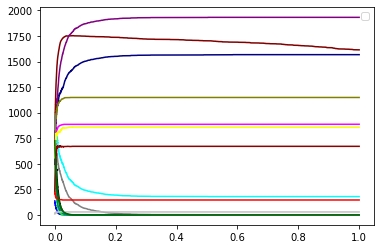

In [68]:
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best')
for species_index, species in enumerate(randomDNAChem.species_lookup['S']):
    species_plot = plt.plot(time_lookup, concentration_lookup[species], color=color_array[species_index], label=species)
plt.show()